In [94]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
import pydot
import graphviz

import numpy as np
import pandas as pd
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]



In [2]:
dataset=pd.read_csv('dataset.csv')
dataset.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data=np.array(dataset)

In [4]:
new_sentences=[]
labels=[]

for row in data:
    labels.append(row[0])
    sen=row[1]
    for word in stopwords:
        token=" "+word+" "
        sen=sen.replace(token," ")
    new_sentences.append(sen)   

In [7]:
print(len(new_sentences))
print(len(labels))
print(labels[0])
print(new_sentences[0])

5572
5572
ham
Go jurong point, crazy.. Available bugis n great world la e buffet... Cine got amore wat...


In [44]:
test_size=0.2
from sklearn.model_selection import train_test_split as tts
train_sentences,test_sentences,train_labels,test_labels=tts(new_sentences,labels,test_size=test_size,random_state=100)


In [45]:
print(len(train_labels))
print(train_labels.count("spam"))

4457
600


In [46]:
for i,value in enumerate(train_labels):
    if value=='spam':
        train_labels[i]=1
    else:
        train_labels[i]=0

In [47]:
for i,value in enumerate(test_labels):
    if value=='spam':
        test_labels[i]=1
    else:
        test_labels[i]=0

In [51]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(train_sentences)
word_index=tokenizer.word_index

In [54]:
train_sequences=tokenizer.texts_to_sequences(train_sentences)
train_padded=pad_sequences(train_sequences,padding='post')

In [61]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[23]))
print(len(train_padded[23]))

print(len(train_sequences[12]))
print(len(train_padded[12]))

6
110
31
110
17
110


In [63]:
test_sequences=tokenizer.texts_to_sequences(test_sentences)
test_padded=pad_sequences(test_sequences,padding='post',maxlen=110)

In [65]:
print(len(test_sequences))
print(test_padded.shape)

1115
(1115, 110)


In [73]:
train_labels=np.array(train_labels).reshape(len(train_labels),1)
print(train_labels.shape)
test_labels=np.array(test_labels).reshape(len(test_labels),1)
print(test_labels.shape)

(4457, 1)

In [79]:
vocab_size=len(word_index)
print(vocab_size)

8005


In [82]:
model=tf.keras.Sequential()
model.add(layers.Embedding(vocab_size,32,input_length=110))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(24,activation='relu'))
model.add(layers.Dense(2,activation='softmax'))

In [83]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [84]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 110, 32)           256160    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                792       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 50        
Total params: 257,002
Trainable params: 257,002
Non-trainable params: 0
_________________________________________________________________


In [91]:
tf.keras.utils.plot_model(model,show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [95]:
model.fit(train_padded,train_labels,epochs=30,validation_split=0.2)

Train on 3565 samples, validate on 892 samples
Epoch 1/30
3565/3565 [==============================] - 5s 1ms/sample - loss: 0.5018 - acc: 0.8468 - val_loss: 0.3521 - val_acc: 0.8733
Epoch 2/30
3565/3565 [==============================] - 1s 233us/sample - loss: 0.3564 - acc: 0.8634 - val_loss: 0.3265 - val_acc: 0.8733
Epoch 3/30
3565/3565 [==============================] - 1s 204us/sample - loss: 0.3141 - acc: 0.8634 - val_loss: 0.2684 - val_acc: 0.8733
Epoch 4/30
3565/3565 [==============================] - 1s 159us/sample - loss: 0.2100 - acc: 0.9001 - val_loss: 0.1550 - val_acc: 0.9529
Epoch 5/30
3565/3565 [==============================] - 1s 167us/sample - loss: 0.1017 - acc: 0.9705 - val_loss: 0.0933 - val_acc: 0.9731
Epoch 6/30
3565/3565 [==============================] - 1s 168us/sample - loss: 0.0574 - acc: 0.9857 - val_loss: 0.0724 - val_acc: 0.9731
Epoch 7/30
3565/3565 [==============================] - 1s 161us/sample - loss: 0.0403 - acc: 0.9882 - val_loss: 0.0620 - val_a

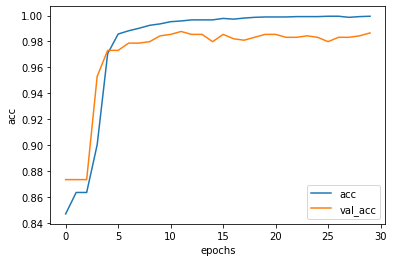

In [97]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.xlabel("epochs")
plt.ylabel("acc")
plt.legend(["acc","val_acc"])
plt.show()

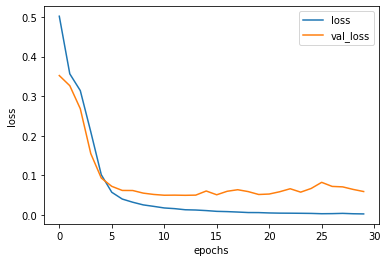

In [98]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["loss","val_loss"])
plt.show()

In [99]:
y_pred=model.predict(test_padded)

In [104]:
y=[]
for row in y_pred:
    value=np.argmax(row)
    y.append(value)
    

In [109]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [110]:
confusion_matrix(test_labels,y)

array([[967,   1],
       [ 11, 136]], dtype=int64)

In [112]:
accuracy_score(test_labels,y)*100

98.9237668161435